In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
plt.rcParams["figure.figsize"] = (12,8)
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('comments.csv')
print(data.shape)
data

(83534, 14)


,post_id,comment_id,comment_author,comment_datetime,comment_score,comment_text,comment_author_post_karma,comment_tag,comment_hour,comment_weekday,post_datetime,post_hour,post_weekday,time_diff
0,145hyey,jnlh1vx,Illustrious_Risk3732,2023-06-09 23:42:43,1.0,He even gives him self Awards to make sure he ...,17109.0,Social Media,23,Fri,2023-06-09 21:51:15,21,Fri,1.857778
1,1453u2o,jnjtk7f,ProdigiousPlays,2023-06-09 16:47:51,1.0,RIF already announced it s shutting down at th...,118844.0,Social Media,16,Fri,2023-06-09 12:25:11,12,Fri,4.377778
2,1453u2o,jnjtv9u,YJSubs,2023-06-09 16:49:52,1.0,I wonder which sub left on that day,50085.0,Social Media,16,Fri,2023-06-09 12:25:11,12,Fri,4.411389
3,1453u2o,jnjusm9,jamnewton22,2023-06-09 16:55:57,1.0,Oh I m sure this will go well lol,171705.0,Social Media,16,Fri,2023-06-09 12:25:11,12,Fri,4.512778
4,1453u2o,jnjvwlv,TriLink710,2023-06-09 17:03:15,1.0,Oh boy i can t wait for him to say the devs a...,70192.0,Social Media,17,Fri,2023-06-09 12:25:11,12,Fri,4.634444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83529,149drws,jo7dx9v,talonredwing,2023-06-15 08:45:37,2.0,You guys are all quants,1927.0,Hardware,8,Thu,2023-06-14 17:30:04,17,Wed,15.259167
83530,149drws,jo77nni,MrCamlost,2023-06-15 07:11:44,0.0,I can t make my mind up about this,2456.0,Hardware,7,Thu,2023-06-14 17:30:04,17,Wed,13.694444
83531,149drws,jo5i09h,a4mula,2023-06-14 21:26:52,2.0,I dunno you re trying to drag me into rabbit ...,38276.0,Hardware,21,Wed,2023-06-14 17:30:04,17,Wed,3.946667
83532,149drws,jo7eblf,ninta,2023-06-15 08:51:38,4.0,Keep trying At some point your brainwave will...,9256.0,Hardware,8,Thu,2023-06-14 17:30:04,17,Wed,15.359444


In [3]:
data.describe()

,comment_score,comment_author_post_karma,comment_hour,post_hour,time_diff
count,83534.000000,8.353400e+04,83534.000000,83534.000000,83534.000000
mean,34.183171,8.461448e+04,12.729499,14.230996,9.212319
std,304.504055,1.831331e+05,7.152262,5.845288,12.104479
min,-166.000000,-1.000000e+02,0.000000,0.000000,0.000000
25%,1.000000,6.894250e+03,6.000000,11.000000,3.630000
50%,3.000000,2.825500e+04,14.000000,15.000000,6.782778
75%,10.000000,9.072700e+04,19.000000,19.000000,11.466806
max,22871.000000,8.745251e+06,23.000000,23.000000,315.482222


# Time analysis

In [4]:
hours_comment = data[['comment_hour', 'comment_weekday','comment_score']]
hours_comment

,comment_hour,comment_weekday,comment_score
0,23,Fri,1.0
1,16,Fri,1.0
2,16,Fri,1.0
3,16,Fri,1.0
4,17,Fri,1.0
...,...,...,...
83529,8,Thu,2.0
83530,7,Thu,0.0
83531,21,Wed,2.0
83532,8,Thu,4.0


Group by weekday and hour

In [5]:
group_df = hours_comment.groupby(['comment_hour', 'comment_weekday']).count()
group_df = group_df.unstack().sort_values('comment_hour', ascending=False)
group_df = group_df.reindex(columns=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], level='comment_weekday')
group_df

comment_score                               
comment_weekday           Mon  Tue  Wed  Thu   Fri  Sat  Sun
comment_hour                                                
23                        320  324  578  963   778  445  593
22                        449  364  622  749   897  542  661
21                        557  394  617  805   886  575  671
20                        581  351  711  823   812  455  673
19                        657  449  636  738   802  539  682
18                        552  502  751  665   787  575  684
17                        559  437  891  640   822  652  623
16                        569  399  680  612   911  801  701
15                        654  386  643  718   925  964  706
14                        673  298  613  784  1094  644  597
13                        705  225  563  762   928  598  498
12                        493  168  398  608   773  471  453
11                        331  157  242  438   577  379  362
10                        246  161  155  301   382  271  257
9                         163  157   98  221   306  269  247
8                         194  120  114  230   257  287  274
7                         294  144  145  250   251  284  297
6                         358  210  169  325   354  290  288
5                         450  250  210  308   420  377  364
4                         406  262  260  405   446  431  481
3                         491  398  364  521   490  513  542
2                         592  347  368  628   631  544  529
1                         600  342  327  709   662  660  506
0                         608  289  291  587   923  754  539

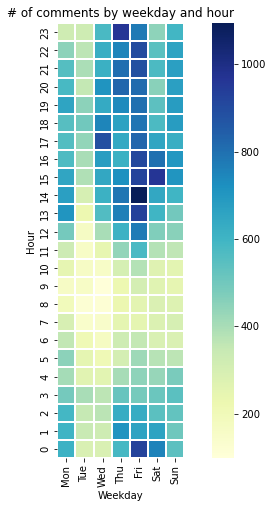

In [6]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(group_df, linewidth=1.5, square=True, cmap='YlGnBu')
ax.set(xticklabels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], xlabel='Weekday')
ax.set(ylabel='Hour', title='# of comments by weekday and hour')
plt.show()

### Differentiating numerical and categorical features

In [7]:
num_feat = data.describe().columns.to_list()
num_feat.remove('comment_hour')
num_feat.remove('post_hour')
num_df = data[num_feat]
num_df.head()

,comment_score,comment_author_post_karma,time_diff
0,1.0,17109.0,1.857778
1,1.0,118844.0,4.377778
2,1.0,50085.0,4.411389
3,1.0,171705.0,4.512778
4,1.0,70192.0,4.634444


In [8]:
cat_feat = []
for i in data.columns:
    if i not in num_feat:
        cat_feat.append(i)
cat_feat.append('comment_score')
cat_feat

['post_id',
 'comment_id',
 'comment_author',
 'comment_datetime',
 'comment_text',
 'comment_tag',
 'comment_hour',
 'comment_weekday',
 'post_datetime',
 'post_hour',
 'post_weekday',
 'comment_score']

In [9]:
cat_df = data[cat_feat]
cat_df.head()

,post_id,comment_id,comment_author,comment_datetime,comment_text,comment_tag,comment_hour,comment_weekday,post_datetime,post_hour,post_weekday,comment_score
0,145hyey,jnlh1vx,Illustrious_Risk3732,2023-06-09 23:42:43,He even gives him self Awards to make sure he ...,Social Media,23,Fri,2023-06-09 21:51:15,21,Fri,1.0
1,1453u2o,jnjtk7f,ProdigiousPlays,2023-06-09 16:47:51,RIF already announced it s shutting down at th...,Social Media,16,Fri,2023-06-09 12:25:11,12,Fri,1.0
2,1453u2o,jnjtv9u,YJSubs,2023-06-09 16:49:52,I wonder which sub left on that day,Social Media,16,Fri,2023-06-09 12:25:11,12,Fri,1.0
3,1453u2o,jnjusm9,jamnewton22,2023-06-09 16:55:57,Oh I m sure this will go well lol,Social Media,16,Fri,2023-06-09 12:25:11,12,Fri,1.0
4,1453u2o,jnjvwlv,TriLink710,2023-06-09 17:03:15,Oh boy i can t wait for him to say the devs a...,Social Media,17,Fri,2023-06-09 12:25:11,12,Fri,1.0


# Adding sentiment score

In [10]:
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Brian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Brian\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
data = pd.read_csv('comments.csv')
data['comment_text'] = data['comment_text'].astype(str)
data['comment_text']

0        He even gives him self Awards to make sure he ...
1        RIF already announced it s shutting down at th...
2                      I wonder which sub left on that day
3                        Oh I m sure this will go well lol
4        Oh boy i can t wait for him to say  the devs a...
                               ...                        
83529                              You guys are all quants
83530                   I can t make my mind up about this
83531    I dunno  you re trying to drag me into rabbit ...
83532    Keep trying  At some point your brainwave will...
83533                               More like spider holes
Name: comment_text, Length: 83534, dtype: object

In [12]:
sid = SentimentIntensityAnalyzer()
data['sentiment_score'] = data['comment_text'].apply(sid.polarity_scores)
data

,post_id,comment_id,comment_author,comment_datetime,comment_score,comment_text,comment_author_post_karma,comment_tag,comment_hour,comment_weekday,post_datetime,post_hour,post_weekday,time_diff,sentiment_score
0,145hyey,jnlh1vx,Illustrious_Risk3732,2023-06-09 23:42:43,1.0,He even gives him self Awards to make sure he ...,17109.0,Social Media,23,Fri,2023-06-09 21:51:15,21,Fri,1.857778,"{'neg': 0.117, 'neu': 0.652, 'pos': 0.23, 'com..."
1,1453u2o,jnjtk7f,ProdigiousPlays,2023-06-09 16:47:51,1.0,RIF already announced it s shutting down at th...,118844.0,Social Media,16,Fri,2023-06-09 12:25:11,12,Fri,4.377778,"{'neg': 0.095, 'neu': 0.789, 'pos': 0.117, 'co..."
2,1453u2o,jnjtv9u,YJSubs,2023-06-09 16:49:52,1.0,I wonder which sub left on that day,50085.0,Social Media,16,Fri,2023-06-09 12:25:11,12,Fri,4.411389,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,1453u2o,jnjusm9,jamnewton22,2023-06-09 16:55:57,1.0,Oh I m sure this will go well lol,171705.0,Social Media,16,Fri,2023-06-09 12:25:11,12,Fri,4.512778,"{'neg': 0.0, 'neu': 0.357, 'pos': 0.643, 'comp..."
4,1453u2o,jnjvwlv,TriLink710,2023-06-09 17:03:15,1.0,Oh boy i can t wait for him to say the devs a...,70192.0,Social Media,17,Fri,2023-06-09 12:25:11,12,Fri,4.634444,"{'neg': 0.042, 'neu': 0.958, 'pos': 0.0, 'comp..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83529,149drws,jo7dx9v,talonredwing,2023-06-15 08:45:37,2.0,You guys are all quants,1927.0,Hardware,8,Thu,2023-06-14 17:30:04,17,Wed,15.259167,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
83530,149drws,jo77nni,MrCamlost,2023-06-15 07:11:44,0.0,I can t make my mind up about this,2456.0,Hardware,7,Thu,2023-06-14 17:30:04,17,Wed,13.694444,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
83531,149drws,jo5i09h,a4mula,2023-06-14 21:26:52,2.0,I dunno you re trying to drag me into rabbit ...,38276.0,Hardware,21,Wed,2023-06-14 17:30:04,17,Wed,3.946667,"{'neg': 0.091, 'neu': 0.844, 'pos': 0.064, 'co..."
83532,149drws,jo7eblf,ninta,2023-06-15 08:51:38,4.0,Keep trying At some point your brainwave will...,9256.0,Hardware,8,Thu,2023-06-14 17:30:04,17,Wed,15.359444,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp..."


In [13]:
data[['comment_text', 'sentiment_score']]

,comment_text,sentiment_score
0,He even gives him self Awards to make sure he ...,"{'neg': 0.117, 'neu': 0.652, 'pos': 0.23, 'com..."
1,RIF already announced it s shutting down at th...,"{'neg': 0.095, 'neu': 0.789, 'pos': 0.117, 'co..."
2,I wonder which sub left on that day,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,Oh I m sure this will go well lol,"{'neg': 0.0, 'neu': 0.357, 'pos': 0.643, 'comp..."
4,Oh boy i can t wait for him to say the devs a...,"{'neg': 0.042, 'neu': 0.958, 'pos': 0.0, 'comp..."
...,...,...
83529,You guys are all quants,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
83530,I can t make my mind up about this,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
83531,I dunno you re trying to drag me into rabbit ...,"{'neg': 0.091, 'neu': 0.844, 'pos': 0.064, 'co..."
83532,Keep trying At some point your brainwave will...,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp..."


In [14]:
data['neg_score'] = data['sentiment_score'].apply(lambda x: x.get('neg'))
data['neutral_score'] = data['sentiment_score'].apply(lambda x: x.get('neu'))
data['pos_score'] = data['sentiment_score'].apply(lambda x: x.get('pos'))
data['comp_score'] = data['sentiment_score'].apply(lambda x: x.get('compound'))

In [15]:
data.head(10)

,post_id,comment_id,comment_author,comment_datetime,comment_score,comment_text,comment_author_post_karma,comment_tag,comment_hour,comment_weekday,post_datetime,post_hour,post_weekday,time_diff,sentiment_score,neg_score,neutral_score,pos_score,comp_score
0,145hyey,jnlh1vx,Illustrious_Risk3732,2023-06-09 23:42:43,1.0,He even gives him self Awards to make sure he ...,17109.0,Social Media,23,Fri,2023-06-09 21:51:15,21,Fri,1.857778,"{'neg': 0.117, 'neu': 0.652, 'pos': 0.23, 'com...",0.117,0.652,0.230,0.3818
1,1453u2o,jnjtk7f,ProdigiousPlays,2023-06-09 16:47:51,1.0,RIF already announced it s shutting down at th...,118844.0,Social Media,16,Fri,2023-06-09 12:25:11,12,Fri,4.377778,"{'neg': 0.095, 'neu': 0.789, 'pos': 0.117, 'co...",0.095,0.789,0.117,0.1923
2,1453u2o,jnjtv9u,YJSubs,2023-06-09 16:49:52,1.0,I wonder which sub left on that day,50085.0,Social Media,16,Fri,2023-06-09 12:25:11,12,Fri,4.411389,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
3,1453u2o,jnjusm9,jamnewton22,2023-06-09 16:55:57,1.0,Oh I m sure this will go well lol,171705.0,Social Media,16,Fri,2023-06-09 12:25:11,12,Fri,4.512778,"{'neg': 0.0, 'neu': 0.357, 'pos': 0.643, 'comp...",0.000,0.357,0.643,0.7351
4,1453u2o,jnjvwlv,TriLink710,2023-06-09 17:03:15,1.0,Oh boy i can t wait for him to say the devs a...,70192.0,Social Media,17,Fri,2023-06-09 12:25:11,12,Fri,4.634444,"{'neg': 0.042, 'neu': 0.958, 'pos': 0.0, 'comp...",0.042,0.958,0.000,-0.1027
5,1453u2o,jnjt1r4,zshift,2023-06-09 16:44:29,1.0,That was almost 6 years ago fuck I thought it...,26996.0,Social Media,16,Fri,2023-06-09 12:25:11,12,Fri,4.321667,"{'neg': 0.231, 'neu': 0.655, 'pos': 0.115, 'co...",0.231,0.655,0.115,-0.4284
6,1453u2o,jnjvk6f,franky3987,2023-06-09 17:00:57,1.0,It s been a few years since I saw that post ...,2236.0,Social Media,17,Fri,2023-06-09 12:25:11,12,Fri,4.596111,"{'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'comp...",0.000,0.797,0.203,0.4215
7,1453u2o,jnjvn67,745395,2023-06-09 17:01:29,1.0,He will set the upvotes to 1 billion,61647.0,Social Media,17,Fri,2023-06-09 12:25:11,12,Fri,4.605000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
8,1453u2o,jnjt225,MrsMurphysChowder,2023-06-09 16:44:33,1.0,I think I am going to start doing that now so...,110480.0,Social Media,16,Fri,2023-06-09 12:25:11,12,Fri,4.322778,"{'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'comp...",0.000,0.846,0.154,0.2924
9,1453u2o,jnjtxn6,CrackBingeIdea,2023-06-09 16:50:19,1.0,Everyone I assume knows this Let s just go ...,21095.0,Social Media,16,Fri,2023-06-09 12:25:11,12,Fri,4.418889,"{'neg': 0.165, 'neu': 0.705, 'pos': 0.13, 'com...",0.165,0.705,0.130,-0.3818


In [16]:
num_feat.extend(['neg_score', 'neutral_score', 'pos_score', 'comp_score'])
num_df = data[num_feat]
num_df.head()

,comment_score,comment_author_post_karma,time_diff,neg_score,neutral_score,pos_score,comp_score
0,1.0,17109.0,1.857778,0.117,0.652,0.230,0.3818
1,1.0,118844.0,4.377778,0.095,0.789,0.117,0.1923
2,1.0,50085.0,4.411389,0.000,1.000,0.000,0.0000
3,1.0,171705.0,4.512778,0.000,0.357,0.643,0.7351
4,1.0,70192.0,4.634444,0.042,0.958,0.000,-0.1027


# Plotting

## Numerical Features

In [17]:
num_feat

['comment_score',
 'comment_author_post_karma',
 'time_diff',
 'neg_score',
 'neutral_score',
 'pos_score',
 'comp_score']

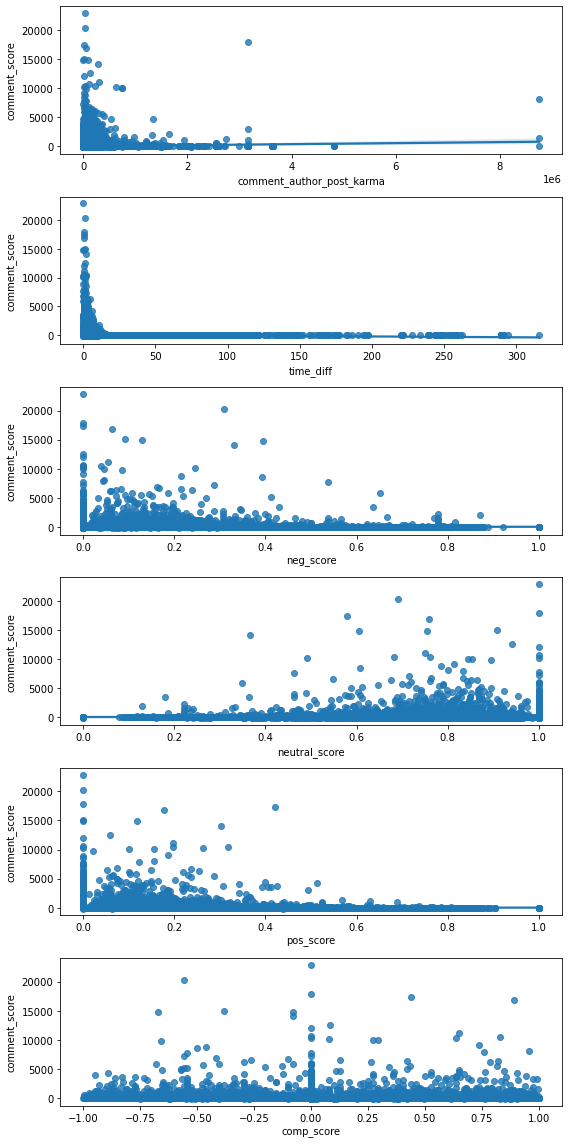

In [18]:
fig, axes = plt.subplots(6, 1, figsize=(8,16))
for i, ax in enumerate(fig.axes):
    sns.regplot(data=num_df, x=num_feat[i+1], y='comment_score',ax=ax)
fig.tight_layout()

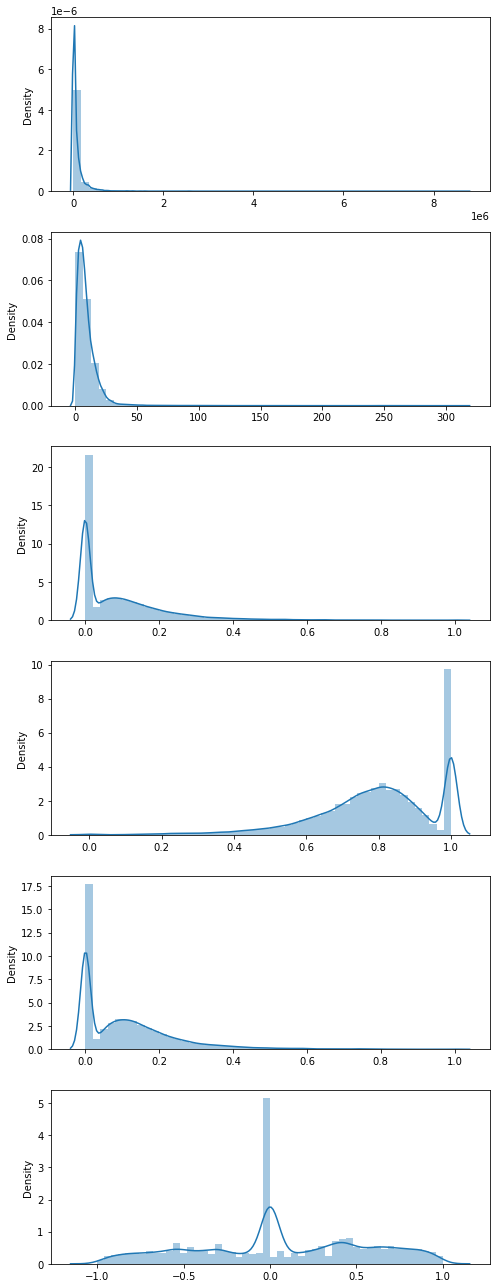

In [19]:
fig, axes = plt.subplots(6, 1, figsize=(7,18))
for i, ax in enumerate(fig.axes):
    sns.distplot(x=num_df[num_feat[i+1]],ax=ax)
fig.tight_layout()

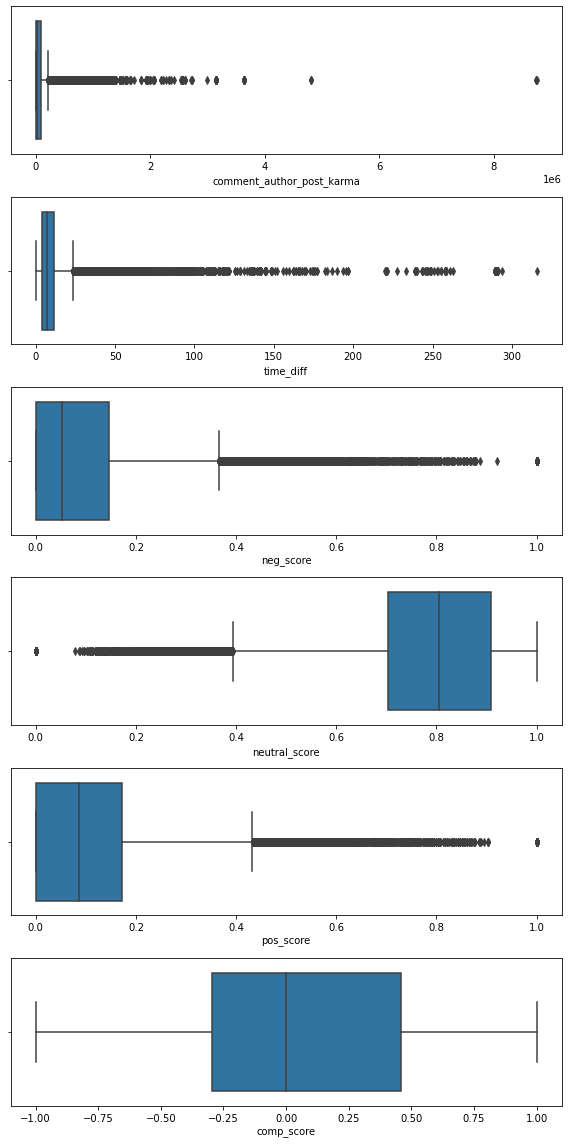

In [20]:
fig, axes = plt.subplots(6, 1, figsize=(8,16))
for i, ax in enumerate(fig.axes):
    sns.boxplot(data=num_df, x=num_feat[i+1],ax=ax)
fig.tight_layout()

Almost all variables except `comp_score` has many outliers. Overall, there are a lot of zero values for the variables. The distribution of author's karma for example, has a lot of zero values. However, for karma of an author, zero means that the author is highly likely new to Reddit or have not posted a lot. This can be a good example for comment scoring system which reddit call upvote/downvote.

## Correlations

In [21]:
num_feat.extend(['comment_hour','post_hour'])

<AxesSubplot:>

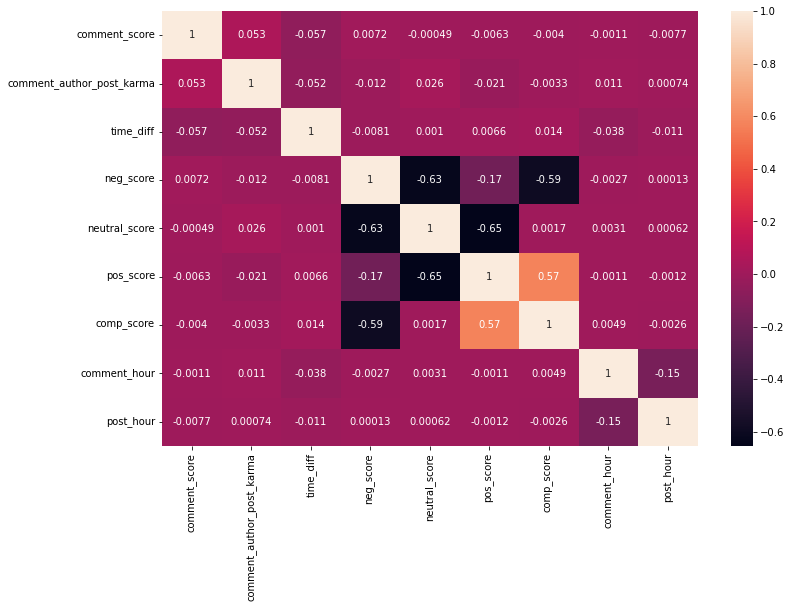

In [22]:
num_df = data[num_feat]
sns.heatmap(num_df.corr(), annot=True)

## Identifying Outliers

In [35]:
def findZ_outliers(column):
    z_scores = np.abs(stats.zscore(data[column]))
    threshold = 2.5
    outlier = z_scores > threshold
#     df_no_outliers = data[~outlier_mask]
    return outlier

In [ ]:
for i in num_feat[1:]:
    findIQR_outliers(i)

In [36]:
test = findZ_outliers(num_feat[1])
test

0        False
1        False
2        False
3        False
4        False
         ...  
83529    False
83530    False
83531    False
83532    False
83533    False
Name: comment_author_post_karma, Length: 83534, dtype: bool

## Removing Outliers based on author's karma

In [41]:
new_df = data.loc[~test].drop('sentiment_score', axis=1)
new_df.shape

(81775, 18)

In [42]:
new_df.head()

,post_id,comment_id,comment_author,comment_datetime,comment_score,comment_text,comment_author_post_karma,comment_tag,comment_hour,comment_weekday,post_datetime,post_hour,post_weekday,time_diff,neg_score,neutral_score,pos_score,comp_score
0,145hyey,jnlh1vx,Illustrious_Risk3732,2023-06-09 23:42:43,1.0,He even gives him self Awards to make sure he ...,17109.0,Social Media,23,Fri,2023-06-09 21:51:15,21,Fri,1.857778,0.117,0.652,0.230,0.3818
1,1453u2o,jnjtk7f,ProdigiousPlays,2023-06-09 16:47:51,1.0,RIF already announced it s shutting down at th...,118844.0,Social Media,16,Fri,2023-06-09 12:25:11,12,Fri,4.377778,0.095,0.789,0.117,0.1923
2,1453u2o,jnjtv9u,YJSubs,2023-06-09 16:49:52,1.0,I wonder which sub left on that day,50085.0,Social Media,16,Fri,2023-06-09 12:25:11,12,Fri,4.411389,0.000,1.000,0.000,0.0000
3,1453u2o,jnjusm9,jamnewton22,2023-06-09 16:55:57,1.0,Oh I m sure this will go well lol,171705.0,Social Media,16,Fri,2023-06-09 12:25:11,12,Fri,4.512778,0.000,0.357,0.643,0.7351
4,1453u2o,jnjvwlv,TriLink710,2023-06-09 17:03:15,1.0,Oh boy i can t wait for him to say the devs a...,70192.0,Social Media,17,Fri,2023-06-09 12:25:11,12,Fri,4.634444,0.042,0.958,0.000,-0.1027


In [43]:
new_df.corr()

,comment_score,comment_author_post_karma,comment_hour,post_hour,time_diff,neg_score,neutral_score,pos_score,comp_score
comment_score,1.000000,0.023438,-0.001575,-0.007197,-0.056840,0.009095,-0.002714,-0.005365,-0.004514
comment_author_post_karma,0.023438,1.000000,0.009748,0.007568,-0.060208,-0.018021,0.033542,-0.024896,-0.006939
comment_hour,-0.001575,0.009748,1.000000,-0.147870,-0.037620,-0.002377,0.003235,-0.001595,0.004219
post_hour,-0.007197,0.007568,-0.147870,1.000000,-0.010826,-0.000029,0.000252,-0.000592,-0.001521
time_diff,-0.056840,-0.060208,-0.037620,-0.010826,1.000000,-0.008549,0.002130,0.005720,0.013423
neg_score,0.009095,-0.018021,-0.002377,-0.000029,-0.008549,1.000000,-0.630109,-0.173351,-0.589834
neutral_score,-0.002714,0.033542,0.003235,0.000252,0.002130,-0.630109,1.000000,-0.654105,0.001436
pos_score,-0.005365,-0.024896,-0.001595,-0.000592,0.005720,-0.173351,-0.654105,1.000000,0.572725
comp_score,-0.004514,-0.006939,0.004219,-0.001521,0.013423,-0.589834,0.001436,0.572725,1.000000


## Exploring Categorical Features

In [46]:
cat_feat = cat_feat[5:8]+cat_feat[9:]
cat_feat

['comment_tag',
 'comment_hour',
 'comment_weekday',
 'post_hour',
 'post_weekday',
 'comment_score']

In [48]:
cat_df = cat_df[cat_feat]
cat_df

,comment_tag,comment_hour,comment_weekday,post_hour,post_weekday,comment_score
0,Social Media,23,Fri,21,Fri,1.0
1,Social Media,16,Fri,12,Fri,1.0
2,Social Media,16,Fri,12,Fri,1.0
3,Social Media,16,Fri,12,Fri,1.0
4,Social Media,17,Fri,12,Fri,1.0
...,...,...,...,...,...,...
83529,Hardware,8,Thu,17,Wed,2.0
83530,Hardware,7,Thu,17,Wed,0.0
83531,Hardware,21,Wed,17,Wed,2.0
83532,Hardware,8,Thu,17,Wed,4.0


In [50]:
cat_df.dtypes

comment_tag         object
comment_hour         int64
comment_weekday     object
post_hour            int64
post_weekday        object
comment_score      float64
dtype: object

In [51]:
cat_df['comment_hour']=cat_df['comment_hour'].astype('object')
cat_df['post_hour']=cat_df['post_hour'].astype('object')

In [52]:
pd.get_dummies(cat_df)

,comment_score,comment_tag_ADBLOCK WARNING,comment_tag_Artificial Intelligence,comment_tag_Biotechnology,comment_tag_Business,comment_tag_Crypto,comment_tag_Energy,comment_tag_Hardware,comment_tag_Machine Learning,comment_tag_Nanotech/Materials,...,post_hour_21,post_hour_22,post_hour_23,post_weekday_Fri,post_weekday_Mon,post_weekday_Sat,post_weekday_Sun,post_weekday_Thu,post_weekday_Tue,post_weekday_Wed
0,1.0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83529,2.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
83530,0.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
83531,2.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
83532,4.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [62]:
pd.get_dummies(cat_df).astype('float').corr()[:22].sort_values('comment_score', ascending=False)

,comment_score,comment_tag_ADBLOCK WARNING,comment_tag_Artificial Intelligence,comment_tag_Biotechnology,comment_tag_Business,comment_tag_Crypto,comment_tag_Energy,comment_tag_Hardware,comment_tag_Machine Learning,comment_tag_Nanotech/Materials,...,post_hour_21,post_hour_22,post_hour_23,post_weekday_Fri,post_weekday_Mon,post_weekday_Sat,post_weekday_Sun,post_weekday_Thu,post_weekday_Tue,post_weekday_Wed
comment_score,1.000000,-0.008533,-0.017510,-0.008341,-0.014774,-0.004691,-0.017171,-0.009137,-0.002153,-0.006304,...,0.011843,0.010645,-0.008919,-0.005824,-0.006393,-0.021041,0.013841,0.006580,-0.003761,0.014006
comment_tag_Social Media,0.044325,-0.094076,-0.169587,-0.110269,-0.378333,-0.044168,-0.162574,-0.200666,-0.017569,-0.082307,...,0.040846,0.124721,-0.012832,0.158182,-0.097948,-0.079836,-0.092521,0.073372,-0.073190,0.054829
comment_tag_Software,0.042561,-0.014148,-0.025503,-0.016583,-0.056896,-0.006642,-0.024449,-0.030177,-0.002642,-0.012378,...,-0.027587,-0.035018,-0.023029,-0.062863,-0.016295,-0.018268,-0.041386,0.074188,0.119050,-0.025336
comment_tag_Security,-0.001469,-0.023711,-0.042744,-0.027793,-0.095357,-0.011132,-0.040976,-0.050577,-0.004428,-0.020745,...,-0.032632,-0.044926,-0.040350,-0.082748,0.244131,-0.053230,-0.046689,-0.007568,-0.028816,0.001570
comment_tag_TechSupport,-0.002017,-0.002775,-0.005002,-0.003253,-0.011159,-0.001303,-0.004795,-0.005919,-0.000518,-0.002428,...,-0.005411,-0.006868,-0.004722,-0.012330,-0.008930,-0.009770,0.060761,-0.011280,-0.007386,-0.011011
comment_tag_Machine Learning,-0.002153,-0.002309,-0.004162,-0.002706,-0.009284,-0.001084,-0.003990,-0.004924,1.000000,-0.002020,...,0.042852,-0.005714,-0.003929,0.017338,-0.007430,-0.008128,-0.008529,-0.009385,0.029892,-0.009161
comment_tag_Space,-0.002534,-0.012362,-0.022284,-0.014489,-0.049713,-0.005804,-0.021362,-0.026367,-0.002309,-0.010815,...,-0.024104,-0.030171,-0.021036,-0.052731,0.023447,-0.043203,-0.045668,-0.029919,0.261945,-0.042855
comment_tag_Privacy,-0.002929,-0.013946,-0.025141,-0.016347,-0.056087,-0.006548,-0.024101,-0.029748,-0.002605,-0.012202,...,-0.015023,-0.034520,-0.023733,-0.020715,0.010125,-0.028828,0.120311,-0.033704,-0.001849,-0.038806
comment_tag_Net Neutrality,-0.003039,-0.003377,-0.006088,-0.003958,-0.013582,-0.001586,-0.005836,-0.007204,-0.000631,-0.002955,...,-0.006585,0.068740,-0.005747,0.011815,-0.010869,-0.011891,-0.012476,0.038827,-0.008989,-0.013401
comment_tag_Robotics/Automation,-0.003460,-0.004182,-0.007538,-0.004901,-0.016817,-0.001963,-0.007226,-0.008920,-0.000781,-0.003659,...,-0.008154,0.009584,-0.007116,-0.018581,0.070949,-0.014723,0.000876,-0.011903,-0.005273,-0.012279


In [65]:
pd.get_dummies(cat_df).astype('float').corr()[22:46].sort_values('comment_score', ascending=False)

,comment_score,comment_tag_ADBLOCK WARNING,comment_tag_Artificial Intelligence,comment_tag_Biotechnology,comment_tag_Business,comment_tag_Crypto,comment_tag_Energy,comment_tag_Hardware,comment_tag_Machine Learning,comment_tag_Nanotech/Materials,...,post_hour_21,post_hour_22,post_hour_23,post_weekday_Fri,post_weekday_Mon,post_weekday_Sat,post_weekday_Sun,post_weekday_Thu,post_weekday_Tue,post_weekday_Wed
comment_hour_12,0.015601,-0.008359,0.015828,0.016072,-0.012336,-0.006014,-0.007481,-0.007357,-0.001320,-0.009815,...,0.000877,0.004324,0.014580,0.007826,0.009251,-0.011482,-0.007906,0.011747,-0.022796,0.006574
comment_hour_11,0.011918,-0.008567,0.009138,0.021707,-0.001740,-0.001023,-0.007036,-0.005138,-0.003637,-0.003877,...,0.017827,0.008256,0.015073,0.010873,-0.007586,-0.005052,-0.001780,0.009635,-0.011177,-0.000394
comment_hour_0,0.007600,0.021089,-0.002659,-0.003350,0.009796,0.003401,-0.007902,-0.005377,-0.001947,0.026554,...,0.051184,0.075914,0.008931,0.000287,-0.028305,-0.001542,0.000456,0.037095,-0.004816,-0.009163
comment_hour_18,0.007097,-0.014529,-0.002309,-0.017522,-0.000203,-0.005361,0.025489,-0.009777,0.000137,-0.004027,...,-0.041858,-0.055858,-0.026684,-0.007061,0.001742,0.000143,-0.004810,-0.019042,0.026144,0.010631
comment_hour_22,0.005702,0.018625,-0.000407,-0.009123,0.008771,0.003501,0.001312,0.007224,0.000402,0.006671,...,0.006469,-0.024313,-0.037454,0.013059,-0.008252,-0.007236,0.001476,0.003666,0.006195,-0.009998
comment_hour_2,0.005481,0.019526,-0.008076,0.026650,0.003414,-0.004381,-0.012203,0.001628,-0.001606,0.008454,...,0.050312,0.059560,0.029934,-0.016380,-0.008694,-0.003378,0.015297,-0.005352,0.009052,0.012397
comment_hour_3,0.003650,0.008077,-0.006099,0.010318,-0.004769,-0.001200,-0.018246,0.002531,-0.001271,0.008198,...,0.033447,0.057816,0.035328,-0.012522,0.003535,-0.005783,0.018636,-0.017305,0.004226,0.012480
comment_hour_23,0.003537,0.028659,-0.000441,-0.013043,0.001561,0.009829,-0.006185,0.001487,0.006147,0.014251,...,0.024741,0.059235,-0.012054,0.001139,-0.024408,-0.014311,-0.000412,0.043519,-0.001680,-0.009703
comment_hour_13,0.002759,-0.010012,0.004438,0.009552,-0.022288,-0.006914,0.006054,-0.002382,0.013489,-0.012459,...,-0.021266,-0.007058,0.003304,0.000756,0.032413,-0.003134,-0.025604,0.012183,-0.031839,0.009672
comment_hour_1,0.001942,0.013866,-0.004166,0.018565,-0.006953,-0.002583,-0.012858,0.012871,-0.004537,0.026406,...,0.056873,0.051847,0.024658,-0.002700,-0.013388,-0.004522,0.005972,-0.004829,-0.001994,0.019252


In [67]:
pd.get_dummies(cat_df).astype('float').corr()[46:53].sort_values('comment_score', ascending=False)

,comment_score,comment_tag_ADBLOCK WARNING,comment_tag_Artificial Intelligence,comment_tag_Biotechnology,comment_tag_Business,comment_tag_Crypto,comment_tag_Energy,comment_tag_Hardware,comment_tag_Machine Learning,comment_tag_Nanotech/Materials,...,post_hour_21,post_hour_22,post_hour_23,post_weekday_Fri,post_weekday_Mon,post_weekday_Sat,post_weekday_Sun,post_weekday_Thu,post_weekday_Tue,post_weekday_Wed
comment_weekday_Wed,0.023605,-0.038408,-0.029754,-0.003515,-0.046664,0.018502,-0.032208,0.047675,-0.002619,-0.030765,...,-0.024808,-0.087912,-0.066179,-0.186040,-0.122037,-0.145435,-0.147253,-0.170382,0.218922,0.590520
comment_weekday_Sun,0.007151,-0.045733,0.069910,-0.036525,0.152831,-0.019665,0.033383,-0.083276,-0.008599,0.032115,...,-0.024522,-0.060878,0.097777,-0.177463,-0.146999,0.311389,0.511448,-0.183461,-0.121797,-0.179679
comment_weekday_Thu,0.001595,0.059489,-0.007122,0.131782,0.000379,-0.020114,0.026459,-0.010238,-0.004572,-0.036896,...,0.005753,0.075393,-0.074422,-0.219351,-0.157072,-0.172928,-0.180351,0.485952,-0.123052,0.298175
comment_weekday_Tue,-0.003712,0.043639,-0.018119,0.014662,-0.066628,0.114052,0.054789,0.224565,0.012229,-0.021279,...,-0.046804,0.008832,-0.017952,-0.149562,0.276596,-0.118234,-0.110647,-0.136624,0.557527,-0.134704
comment_weekday_Fri,-0.006605,0.031558,-0.049804,-0.052584,-0.018794,-0.022606,-0.032697,-0.073377,0.013237,-0.046296,...,-0.005332,0.160165,-0.039349,0.517129,-0.173973,-0.190576,-0.199774,0.262306,-0.141549,-0.203620
comment_weekday_Mon,-0.007669,-0.004254,0.054596,-0.001378,-0.047493,-0.020859,-0.030280,0.003643,-0.008297,0.143199,...,0.000781,-0.041117,-0.063053,-0.191727,0.564882,-0.138108,0.305011,-0.178473,-0.117739,-0.174233
comment_weekday_Sat,-0.013091,-0.046244,-0.017834,-0.049989,0.010356,-0.021063,-0.008312,-0.049622,-0.000503,-0.035554,...,0.083630,-0.081472,0.161390,0.308866,-0.148507,0.445765,-0.170556,-0.177729,-0.121470,-0.181864


In [69]:
pd.get_dummies(cat_df).astype('float').corr()[53:77].sort_values('comment_score', ascending=False)

,comment_score,comment_tag_ADBLOCK WARNING,comment_tag_Artificial Intelligence,comment_tag_Biotechnology,comment_tag_Business,comment_tag_Crypto,comment_tag_Energy,comment_tag_Hardware,comment_tag_Machine Learning,comment_tag_Nanotech/Materials,...,post_hour_21,post_hour_22,post_hour_23,post_weekday_Fri,post_weekday_Mon,post_weekday_Sat,post_weekday_Sun,post_weekday_Thu,post_weekday_Tue,post_weekday_Wed
post_hour_0,0.030440,-0.012207,-0.023690,-0.015404,-0.047064,-0.006170,-0.001096,-0.028032,-0.002454,-0.011498,...,-0.025626,-0.032529,-0.022364,-0.045982,0.057421,-0.039313,0.012226,-0.047949,-0.021391,0.089109
post_hour_1,0.023126,-0.007195,-0.031116,-0.020232,0.047774,-0.008104,-0.029829,-0.036467,-0.003224,-0.015102,...,-0.033658,-0.042725,-0.029374,0.051962,-0.017959,-0.058216,0.179792,-0.066800,-0.030270,-0.067855
post_hour_11,0.022784,-0.030373,-0.021514,-0.031559,0.023944,-0.014260,0.057302,-0.032277,-0.005672,-0.019731,...,-0.059225,-0.075179,-0.051687,-0.041275,0.073428,-0.075864,0.030358,0.037272,-0.015591,-0.004235
post_hour_17,0.019059,0.155175,0.097774,-0.021771,-0.074152,-0.010122,-0.035874,0.000519,-0.004026,0.019695,...,-0.042038,-0.053362,-0.036688,-0.026592,0.028766,-0.011555,0.026068,-0.002294,0.060334,-0.052421
post_hour_8,0.012573,-0.021853,-0.009189,-0.025614,0.046402,-0.010260,0.014470,-0.034497,-0.004081,-0.019119,...,-0.042612,-0.054090,-0.037188,0.094857,0.058306,-0.076755,0.096922,-0.085292,-0.053513,-0.047663
post_hour_21,0.011843,-0.024104,0.014155,-0.005695,0.031836,-0.006875,-0.040407,-0.042145,0.042852,-0.011489,...,1.000000,-0.059663,-0.041019,0.081282,-0.071559,-0.020489,0.000436,-0.021578,0.003624,0.011737
post_hour_22,0.010645,-0.030597,-0.043985,-0.035499,0.063560,-0.014365,-0.050856,-0.065265,-0.005714,-0.022885,...,-0.059663,1.000000,-0.052069,-0.103079,-0.014972,-0.052725,-0.048995,0.246314,-0.076278,0.024677
post_hour_16,0.005997,-0.030578,-0.038598,-0.035841,0.060475,-0.014356,0.104324,-0.065223,-0.005711,-0.006831,...,-0.059625,-0.075686,-0.052035,0.040396,-0.078775,0.042409,-0.004659,-0.100346,-0.081041,0.151359
post_hour_19,0.000417,-0.027997,-0.023708,0.164835,-0.049507,-0.013145,-0.038561,0.075377,-0.005229,-0.008231,...,-0.054593,-0.069298,-0.047644,-0.085956,0.015406,-0.083831,0.113772,-0.036623,0.016711,0.072879
post_hour_2,-0.002899,-0.016907,0.081130,-0.019817,-0.042488,-0.000202,-0.001398,-0.013105,-0.003158,-0.014792,...,-0.032968,-0.041849,-0.028772,-0.048150,-0.054411,-0.040071,0.008353,0.067336,0.116328,-0.026745


In [70]:
pd.get_dummies(cat_df).astype('float').corr()[77:].sort_values('comment_score', ascending=False)

,comment_score,comment_tag_ADBLOCK WARNING,comment_tag_Artificial Intelligence,comment_tag_Biotechnology,comment_tag_Business,comment_tag_Crypto,comment_tag_Energy,comment_tag_Hardware,comment_tag_Machine Learning,comment_tag_Nanotech/Materials,...,post_hour_21,post_hour_22,post_hour_23,post_weekday_Fri,post_weekday_Mon,post_weekday_Sat,post_weekday_Sun,post_weekday_Thu,post_weekday_Tue,post_weekday_Wed
post_weekday_Wed,0.014006,-0.048168,-0.027361,0.150433,-0.045042,-0.021785,-0.069901,0.073086,-0.009161,-0.037535,...,0.011737,0.024677,-0.075136,-0.217966,-0.157867,-0.172713,-0.181223,-0.199404,-0.130560,1.000000
post_weekday_Sun,0.013841,-0.045668,0.151194,-0.039973,0.122469,-0.021441,-0.006494,-0.091647,-0.008529,0.193694,...,0.000436,-0.048995,-0.072494,-0.202923,-0.146972,-0.160794,1.000000,-0.185643,-0.121550,-0.181223
post_weekday_Thu,0.006580,0.148122,-0.020228,-0.039982,0.024416,-0.022980,0.030220,-0.088858,-0.009385,-0.041315,...,-0.021578,0.246314,-0.029982,-0.223281,-0.161717,-0.176925,-0.185643,1.000000,-0.133744,-0.199404
post_weekday_Tue,-0.003761,-0.025290,-0.023005,-0.023801,-0.047187,0.170483,0.081807,0.082663,0.029892,-0.028785,...,0.003624,-0.076278,-0.053581,-0.146194,-0.105884,-0.115842,-0.121550,-0.133744,1.000000,-0.130560
post_weekday_Fri,-0.005824,-0.054927,-0.041755,-0.059442,-0.031509,-0.025788,-0.030659,-0.038886,0.017338,-0.047743,...,0.081282,-0.103079,0.120412,1.000000,-0.176770,-0.193394,-0.202923,-0.223281,-0.146194,-0.217966
post_weekday_Mon,-0.006393,0.068463,-0.018244,0.052031,-0.117148,-0.018678,-0.037180,0.183913,-0.007430,-0.012873,...,-0.071559,-0.014972,-0.030303,-0.176770,1.000000,-0.140070,-0.146972,-0.161717,-0.105884,-0.157867
post_weekday_Sat,-0.021041,-0.043524,-0.020073,-0.038081,0.079365,-0.017725,0.054398,-0.079015,-0.008128,-0.023074,...,-0.020489,-0.052725,0.120355,-0.193394,-0.140070,1.000000,-0.160794,-0.176925,-0.115842,-0.172713
